## Классификация на основе нейрона 

### Импортируем библиотеки

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Имеются данные о точках:

In [5]:
# считаем данные в DataFrame
data = pd.read_csv('Points.csv', index_col=0)
data.head(10)

,x1,x2,answer
1,1.0,1.0,1
2,9.4,6.4,-1
3,2.5,2.1,1
4,8.0,7.7,-1
5,0.5,2.2,1
6,7.9,8.4,-1
7,7.0,7.0,-1
8,2.8,0.8,1
9,1.2,3.0,1
10,7.8,6.1,-1


Изобразим данные на графике:

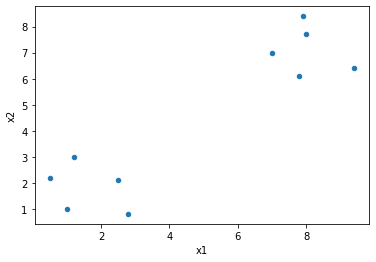

In [3]:
#параметр scatter для графиков рассеяния
data.plot(kind='scatter', x='x1', y='x2')
plt.show()

Генерируем начальное приближение $ W^0 $ весовых коэффициентов. Для этого берем случайные значения в диапазоне $[0,1]$

In [4]:
import random
w = np.array([random.random() for i in range(3)])
print(w)

[0.27726667 0.50575513 0.92012083]


Внутри нейрона cначала значения входов умножаются на **веса**:
$$x_1 \to w_1*x_1, x_2 \to w_2*x_2 $$
Затем взвешенные входы складываются, и к ним прибавляется значение порога b:
$$w_1*x_1+w_2*x_2+w_3*1=0$$
Выразим из полученного выражения каноническое уравнение прямой $y=k*x+b$:
$$x_2=-\frac{w_1}{w_2}*x_1-\frac{w_3}{w_2}$$

In [5]:
#Выбираем в качестве двух точек, по которым мы будем строить прямую - те, у которых минимальное и максимольное 
#значение по оси x_1. Далее подставляем эти координаты в уравнение прямой и находим x_2 координату точек
X = pd.DataFrame({'X_1': [data.x1.min(), data.x1.max()]})
X.head()
Y = -w[0]/w[1]*X-w[2]/w[1]
print(X)
print(Y)

   X_1
0  0.5
1  9.4
        X_1
0 -2.093413
1 -6.972599


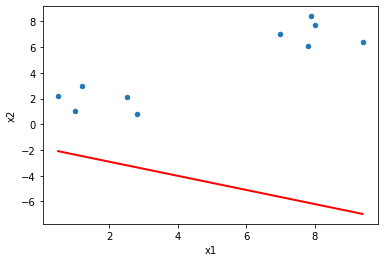

In [6]:
# сначала выводим график обучающей выборки
data.plot(kind='scatter', x='x1', y='x2')
# потом полученную прямую
plt.plot(X, Y, c='red', linewidth=2)
plt.show()

Находим $f(net)=sign(w_1*x_1+w_2*x_2+w_3*1)$

Если $f(net)$ не совпадает с ответом из обучающей выборки - меняем весовые коэффициенты по формуле
$$
W^t=W^{t-1}+c*(d^{t-1}-sign((W^{t-1})^{T}*X^{t-1}))*X^{t-1},
$$
где $d^{t-1}$ - ответ из выборки, а $sign((W^{t-1})^{T}*X^{t-1}))$ - ответ сети

In [7]:
counter = 1 
flag = 1
while flag == 1:
    flag = 0 
    print('Прогонка №', counter)
    for i in range(1,len(data.index)+1):
        point_coord = np.array([data.loc[i]['x1'],data.loc[i]['x2'],1])
        f_net = np.sign(np.dot(w,point_coord))
        #print('f(net)=',f_net)
        #print('d_',i,'=',data.loc[i]['answer'])
        if f_net == data.loc[i]['answer']:
            print('Значения совпадают продолжаем')
        else:
            print('Значения не совпадают меняем веса')
            flag = 1
            w = w + 0.1 * (data.loc[i]['answer'] - f_net) * point_coord
            print('w=',w)
    counter += 1

Прогонка № 1
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [-1.60273333 -0.77424487  0.72012083]
Значения не совпадают меняем веса
w= [-1.10273333 -0.35424487  0.92012083]
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [-1.00273333  0.08575513  1.12012083]
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [-0.44273333  0.24575513  1.32012083]
Значения совпадают продолжаем
Значения совпадают продолжаем
Прогонка № 2
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем


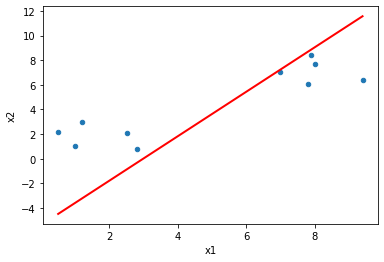

In [8]:
Y = -(w[0]/w[1])*X-(w[2]/w[1])
# сначала выводим график обучающей выборки
data.plot(kind='scatter', x='x1', y='x2')
# потом полученную прямую
plt.plot(X, Y, c='red', linewidth=2)
plt.show()

8 8
8.0 8.0
-1


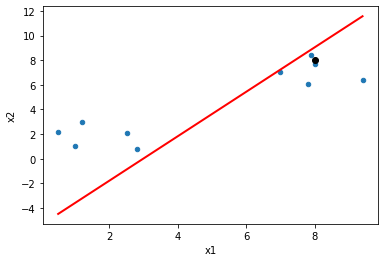

In [14]:
# вводим какую-то новую точку
x_p, y_p = map(float, input().split())
# если выше прямой - класс -1 
if (-y_p-(w[0]/w[1])*x_p-(w[2]/w[1])) > 0: 
    print("-1")
# если ниже прямой класс +1 
elif (-y_p-(w[0]/w[1])*x_p-(w[2]/w[1])) < 0:
    print("+1") 
# иначе = 0 или другими словами точка на прямой
else: 
    print("на прямой")
# сначала выводим график обучающей выборки
data.plot(kind='scatter', x='x1', y='x2')
# новую точку
plt.plot(x_p,y_p, color='black',marker="o")
# потом полученную прямую
plt.plot(X, Y, c='red', linewidth=2)
plt.show()